In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [ ]:
data = [[0.9,0.1,1,0],[0.8,0.2,1,0],[0.7,0.3,1,0],[0.95,0.05,1,0],[0.81,0.19,1,0],
        [0.09,0.91,0,1],[0.08,0.92,0,1],[0.07,0.93,0,1],[0.15,0.85,0,1],[0.19,0.81,0,1],
        [0.89,0.11,1,0],[0.78,0.22,1,0],[0.83,0.17,1,0],[0.99,0.01,1,0],[0.69,0.31,1,0],
        [0.23,0.77,0,1],[0.11,0.89,0,1],[0.03,0.97,0,1],[0.01,0.99,0,1],[0.28,0.72,0,1]]

In [ ]:
df = pd.DataFrame(columns=['x1', 'x2', 'y1', 'y2'], data=data)
y = df[['y1', 'y2']]
X = df.drop(['y1', 'y2'], axis=1)

In [ ]:
## One output node
train_x, test_x, train_y, test_y = train_test_split(X, y['y1'], test_size=0.2, random_state=21)
print(test_y)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2, 1)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.summary()

7     0
10    1
19    0
13    1
Name: y1, dtype: int64
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 2)                 0         
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Two output nodes
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=21)
print(test_y)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2, 1)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.summary()

    y1  y2
7    0   1
10   1   0
19   0   1
13   1   0
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 2)                 0         
                                                                 
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        print(model.get_weights())
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))
        
model.fit(train_x, train_y, batch_size=None, epochs=1000, callbacks=[CustomCallback()]) # None means 32

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: 0.5932 - accuracy: 0.5000
Epoch 168/1000
[array([[ 0.91270566, -0.24318138],
       [-1.0047283 ,  1.1625402 ]], dtype=float32), array([-0.14758891,  0.19362086], dtype=float32), array([[-0.9743636 , -0.39800715],
       [-0.00247154,  0.6354416 ]], dtype=float32), array([0.15399821, 0.12969209], dtype=float32)]
...Training: start of batch 0; got log keys: []
1/1 [==============================] - 0s 11ms/step - loss: 0.5914 - accuracy: 0.5000
Epoch 169/1000
[array([[ 0.9118918 , -0.24397418],
       [-1.005362  ,  1.1634343 ]], dtype=float32), array([-0.14833723,  0.19467361], dtype=float32), array([[-0.9735535 , -0.39797232],
       [-0.00164521,  0.6360549 ]], dtype=float32), array([0.15482251, 0.13018411], dtype=float32)]
...Training: start of batch 0; got log keys: []
1/1 [==============================] - 0s 14ms/step - loss: 0.5896 - accuracy: 0.5000
Epoch 170/1000
[arr

In [ ]:
model.fit(train_x, train_y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2114 - accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2113 - accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2112 - accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2111 - accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2110 - accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2109 - accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2108 - accuracy: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2107 - accuracy: 1.0000
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2106 - accuracy: 1.0000
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2105 - accuracy: 1.0000
Epoch 11/1000
1/1

In [ ]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.1017 - accuracy: 1.0000 - 107ms/epoch - 107ms/step

Test accuracy: 1.0


In [ ]:
model.get_weights()

[array([[ 0.33199906, -1.7698148 ],
        [-0.9813139 ,  2.1498055 ]], dtype=float32),
 array([-0.53741664, -0.38127932], dtype=float32),
 array([[-0.17875528, -1.2217098 ],
        [-0.31376347,  1.2742695 ]], dtype=float32),
 array([0.6598161 , 0.22637612], dtype=float32)]

In [53]:
import random

In [54]:
# Generate 150 random samples with [0<=x1<=0.3, 0.7<=x2<=1, y1=0, y2=1]
for i in range(150):
    x1 = round(random.uniform(0, 0.3), 2)
    x2 = round(random.uniform(0.7, 1), 2)
    y1 = 0
    y2 = 1
    data.append([x1, x2, y1, y2])

In [55]:
# Generate 150 random samples with [0.7<=x1<=1, 0<=x2<=0.3, y1=1, y2=0]
for i in range(150):
    x1 = round(random.uniform(0.7, 1), 2)
    x2 = round(random.uniform(0, 0.3), 2)
    y1 = 1
    y2 = 0
    data.append([x1, x2, y1, y2])

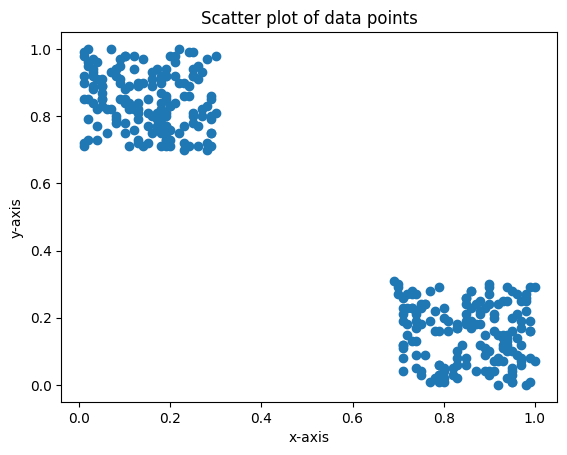

In [56]:
X = [point[0] for point in data]
y = [point[1] for point in data]

plt.scatter(X, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter plot of data points')
plt.show()